# ОТЧЕТ О ВЫПОЛНЕННОМ ПРОЕКТЕ: INTERNET USER IDENTIFICATION

### 1. Цели и задачи проекта, описание исходных и обработанных данных и признаков

Уже в течение многих лет неуклонно растет интерес к методам
обнаружения знаний в базах данных (knowledge discovery in databases).
Объемы современных баз данных, которые весьма внушительны, вызвали
устойчивый спрос на новые масштабируемые алгоритмы анализа данных.

**Одним из популярных и весьма актуальных методов обнаружения знаний
являются алгоритмы поиска шаблонов последовательных событий (sequential
pattern mining или SPM).**

Использование шаблонов позволяет находить закономерности между
связанными во времени событиями.

**Примеры областей применения таких знаний:**
- интернет-торговля. Поиск наиболее частых последовательностей покупок позволяет получить информацию о том, через какой промежуток времени после покупки товара “А” человек наиболее склонен купить товар “Б”
- веб-аналитика. Зная наиболее популярные последовательности переходов по страницам, можно размещать на соответствующих страницах определенный контент 
- биоинформатика (поиск каркасов белковых последовательностей)
- в телекоммуникационных компаниях для анализа данных об авариях на различных узлах телекоммуникационной сети
- анализ последствий природных катаклизмов



**Цель: по последовательности из нескольких веб-сайтов, посещенных подряд один и тем же человеком, идентифицировать человека. То есть, в поведении пользователя в почте будем выделять ряд характеристик:** 
- время суток входа
- число месяца
- день недели
- месяц
- длина сессии
- посещенные сайты
- количество самых популярных среди пользователей интернета посещенных сайтов
- количество уникальных посещенных сайтов 

*Есть операции, которые не характерны для конкретного человека.*

Например: 

- удаление прочитанных писем
- стирание папок
- отправка рассылок

*У человека может сложиться определенное поведение при работе с разными типами писем: *

- прочтение писем от людей 
- удаление рассылок
- игнорирование писем из социальных сетей 

Кроме того, существуют и такие привычки как 
- «читает цепочку непрочитанных писем снизу вверх»
- «авторизуется и идет сначала в Почту, потом — в Диск и уже следом — в Новости» 

Из совокупности этих факторов и складывается профиль пользователя, который не дает полного представления о самом пользователе, но позволяет отличить факт взлома аккаунта от нормальной авторизации. Конечно, этот подход не может быть эффективным без использования машинного обучения. С его помощью определяется набор факторов, которые влияют на профиль, и границы для определения взлома.

В проекте используются данные с прокси-серверов Университета Блеза Паскаля и имеют очень простой вид. Для каждого пользователя заведен csv-файл с названием user****.csv (где вместо звездочек – 4 цифры, соответствующие ID пользователя), а в нем посещения сайтов записаны в следующем формате:
<center>*timestamp, посещенный веб-сайт*</center>

## неделя 1

Данные устроены следующем образом:

 - В каталоге `10users` лежат 10 csv-файлов с названием вида "user[USER_ID].csv", где [USER_ID] – ID пользователя;
 - Аналогично для каталога `150users` – там 150 файлов;
 - В `3users` – игрушечный пример из 3 файлов, это для отладки кода предобработки, который мы далее напишем.


Поставим задачу классификации: идентифицировать пользователя по сессии из 10 подряд посещенных сайтов. Объектом в этой задаче будет сессия из 10 сайтов, последовательно посещенных одним и тем же пользователем, признаками – индексы этих 10 сайтов. Целевым классом будет id пользователя.

<center> данные вида *timestamp, посещенный веб-сайт* преобразуем в Dataframe и словарь</center>

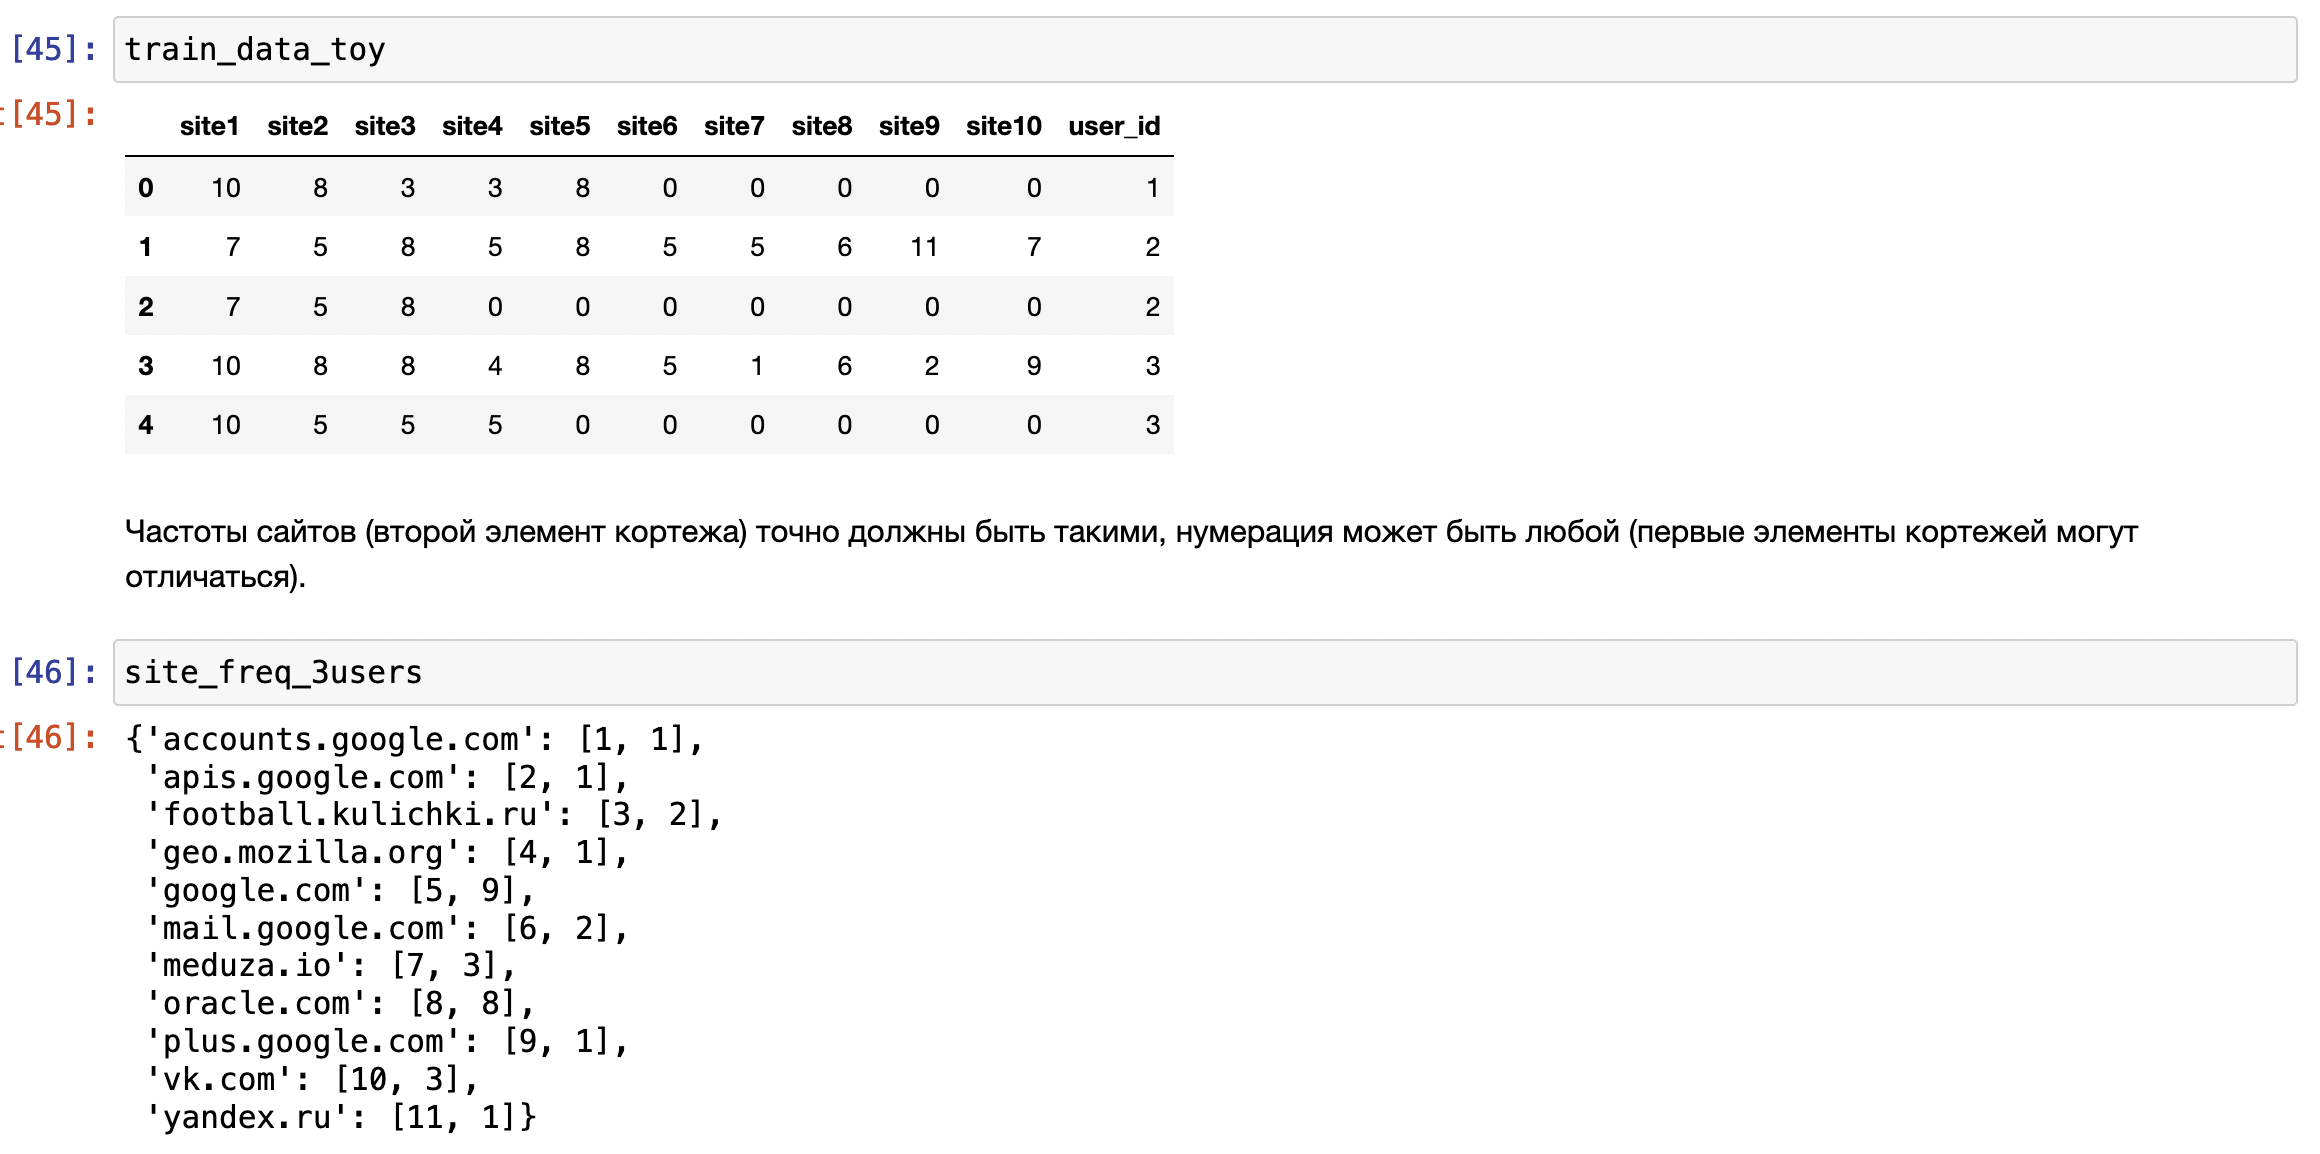

Воспользуемся идеей мешка слов из анализа текстов. Создадим новые матрицы, в которых строкам будут соответствовать сессии из 10 сайтов, а столбцам – индексы сайтов. На пересечении строки 𝑖 и столбца 𝑗 будет стоять число 𝑛𝑖𝑗 – cколько раз сайт 𝑗 встретился в сессии номер 𝑖. 

## неделя 2

Сделаем число сайтов в сессии параметром, чтоб в дальнейшем сравнить модели классификации, обученные на разных выборках – с 5, 7, 10 и 15 сайтами в сессии. Более того, пока мы брали по 10 сайтов подряд, без пересечения. Теперь применяем идею скользящего окна – сессии будут перекрываться. 

Посчитаем распределение числа уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов.
Проверим с помощью QQ-плота, что эта величина не распределена нормально. По гистограмме видно, что распределение биномиальное.

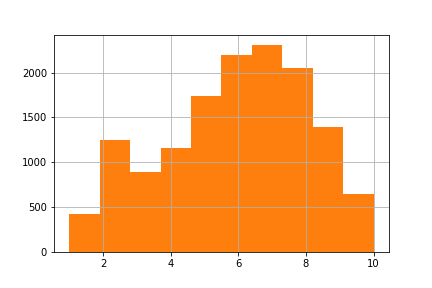

## неделя 3

 - Построение признаков
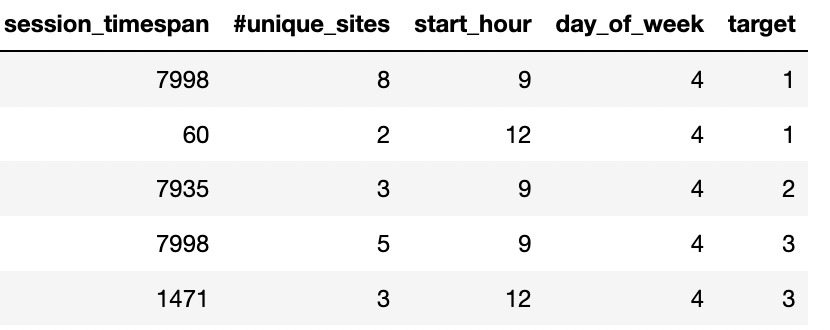

 - Визуальный анализ данных
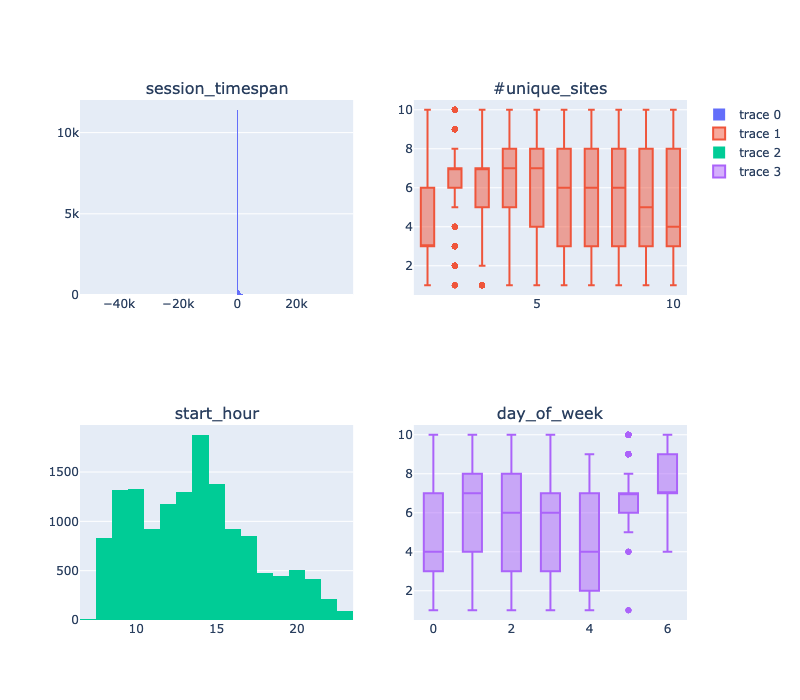

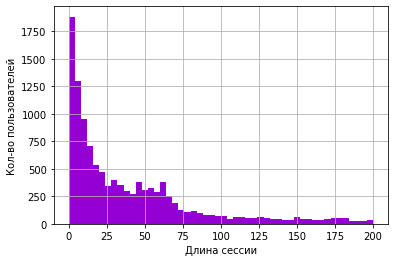

 - Часть 3. Дальнейшее построение признаков

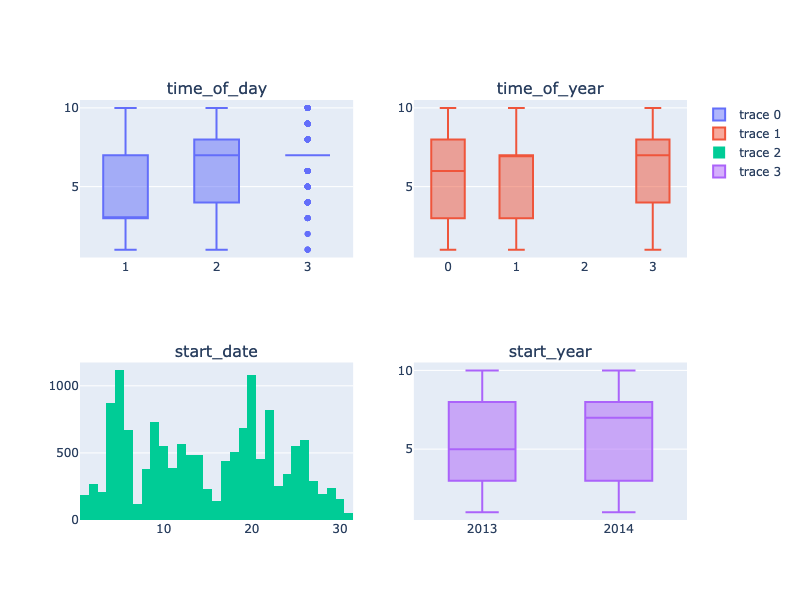

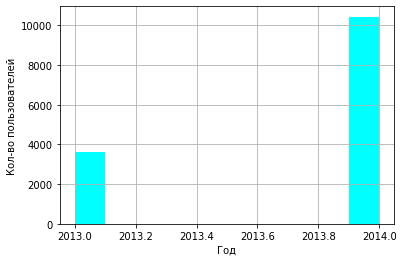

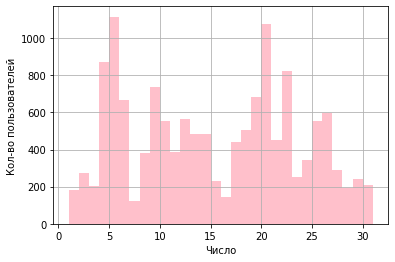

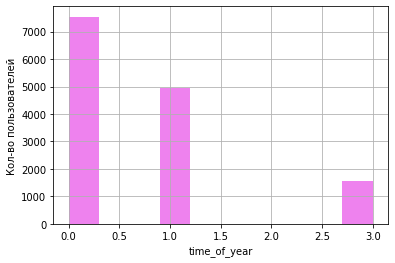

## неделя 4

- **Сравнение нескольких алгоритмов на сессиях из 10 сайтов**

Главная задача обучаемых алгоритмов – их способность обобщаться, то есть хорошо работать на новых данных. Поскольку на новых данных мы сразу не можем проверить качество построенной модели (нам ведь надо для них сделать прогноз, то есть истинных значений целевого признака мы для них не знаем), то надо пожертвовать небольшой порцией данных, чтоб на ней проверить качество модели. 

Надежный способ: **кросс-валидация** (cross-validation, на русский еще переводят как скользящий или перекрестный контроль). Тут самый частый случай – K-fold кросс-валидация

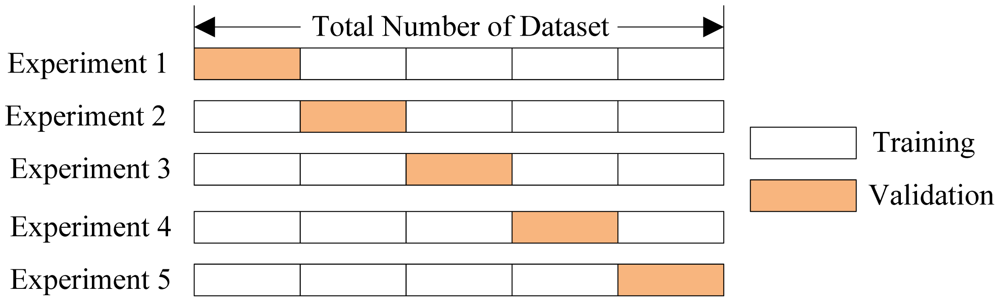

Тут модель обучается $K$ раз на разных ($K-1$) подвыборках исходной выборки (белый цвет), а проверяется на одной подвыборке (каждый раз на разной, оранжевый цвет).
Получаются $K$ оценок качества модели, которые обычно усредняются, выдавая среднюю оценку качества классификации/регрессии на кросс-валидации.

Кросс-валидация дает лучшую по сравнению с отложенной выборкой оценку качества модели на новых данных. Но кросс-валидация вычислительно дорогостоящая, если данных много. 

**<center>Метод ближайших соседей</center>**

Метод ближайших соседей (k Nearest Neighbors, или kNN) — очень популярный метод классификации, также иногда используемый в задачах регрессии. Один из самых понятных подходов к классификации. На уровне интуиции суть метода такова: посмотри на соседей, какие преобладают, таков и ты. Формально основой метода является гипотеза компактности: если метрика расстояния между примерами введена достаточно удачно, то схожие примеры гораздо чаще лежат в одном классе, чем в разных.

Согласно методу ближайших соседей, тестовый пример (зеленый шарик) будет отнесен к классу "синие", а не "красные".

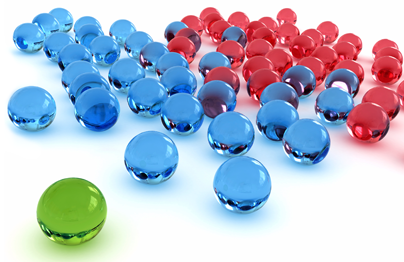

Примечательное свойство такого подхода – его ленивость. Это значит, что вычисления начинаются только в момент классификации тестового примера, а заранее, только при наличии обучающих примеров, никакая модель не строится. 

Выборку разбивали на 2 части. На одной проводили кросс-валидацию, на второй – оценивали модель, обученную после кросс-валидации.

Доли правильных ответов для KNeighborsClassifier на кросс-валидации и отложенной выборке: **0.554** и **0.581**

**<center>Случайный лес</center>**

Простые методы композиции: бэггинг (когда отбирает некоторые объекты, но со всеми признаками) и случайный лес.

Что делать, если вы уже нашли лучшую модель и повысить точность модели больше не можете? В таком случае нужно применить более продвинутые техники машинного обучения, которые можно объединить словом «ансамбли».

Лео Брейман нашел применение бутстрэпу не только в статистике, но и в машинном обучении. Он вместе с Адель Катлер усовершенстовал алгоритм случайного леса, добавив к первоначальному варианту построение некоррелируемых деревьев на основе CART, в сочетании с методом случайных подпространств и бэггинга. 

Решающие деревья являются хорошим семейством базовых классификаторов для бэггинга, поскольку они достаточно сложны и могут достигать нулевой ошибки на любой выборке. Метод случайных подпространств (когда отбираем некоторые признаки всех объектов) позволяет снизить коррелированность между деревьями и избежать переобучения. Базовые алгоритмы обучаются на различных подмножествах признакового описания, которые также выделяются случайным образом.

классификатор $\large a(x) = \frac{1}{N}\sum_{i = 1}^N b_i(x)$, простыми словами — для задачи кассификации мы выбираем решение голосованием по большинству, а в задаче регрессии — средним.

Рекомендуется в задачах классификации брать $\large m = \sqrt{n}$, а в задачах регрессии — $\large m = \frac{n}{3}$, где $\large n$ — число признаков. Также рекомендуется в задачах классификации строить каждое дерево до тех пор, пока в каждом листе не окажется по одному объекту, а в задачах регрессии — пока в каждом листе не окажется по пять объектов.

Таким образом, случайный лес — это бэггинг над решающими деревьями, при обучении которых для каждого разбиения признаки выбираются из некоторого случайного подмножества признаков.

Доли правильных ответов для RandomForestClassifier при Out-of-Bag оценке и на отложенной выборке: **0.727** и **0.717**

**<center>Логистическая регрессия</center>**

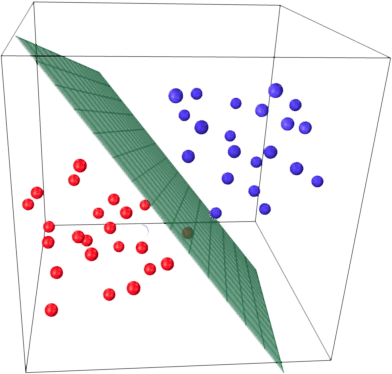

Логистическая регрессия является частным случаем линейного классификатора, но она обладает хорошим "умением" – прогнозировать вероятность $p_+$ отнесения примера $\vec{x_i}$ к классу "+"

Доля правильных ответов на кросс-валидации и на выборке (X_valid, y_valid): **0.757** и **0.778**

**<center>рис: зависимость средней перекрестной оценки от гиперпараметра С (отвечает за силу регуляризации)</center>**

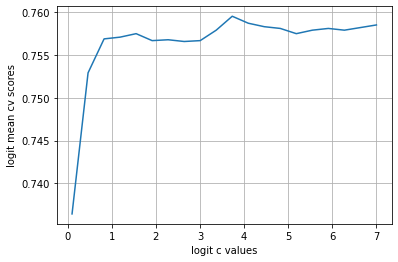

**<center>Метод опорных векторов</center>**

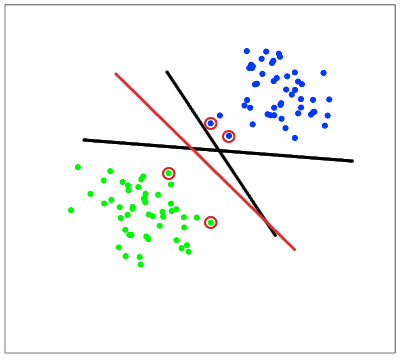

С точки зрения точности классификации лучше всего выбрать прямую, расстояние от которой до каждого класса максимально. Другими словами, выберем ту прямую, которая разделяет классы наилучшим образом (красная прямая на рис). Такая прямая, а в общем случае — гиперплоскость, называется оптимальной разделяющей гиперплоскостью.

Вектора, лежащие ближе всех к разделяющей гиперплоскости, называются опорными векторами (support vectors). На рисунке они помечены красным.


Доля правильных ответов на кросс-валидации и на выборке (X_valid, y_valid): **0.752** и **0.776** 

**<center>рис: зависимость средней перекрестной оценки от гиперпараметра С (отвечает за силу регуляризации)</center>**

Но мы помним, что с параметром регуляризации по умолчанию (С=1) на кросс-валидации доля правильных ответов выше. Это тот случай (не редкий), когда можно ошибиться и перебирать параметры не в том диапазоне (причина в том, что мы взяли равномерную сетку на большом интервале и упустили действительно хороший интервал значений C). Здесь намного осмысленней подбирать C в районе 1, к тому же, так модель быстрее обучается, чем при больших C. 



**<center>рис: зависимость средней перекрестной оценки от гиперпараметра С = 1 (отвечает за силу регуляризации)</center>**

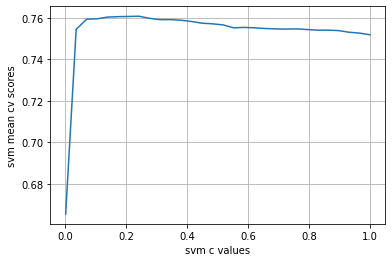

**<center>XGBoost</center>**

XGBoost — алгоритм машинного обучения, основанный на дереве поиска решений и использующий фреймворк градиентного бустинга. В **задачах** предсказания, которые используют **неструктурированные данные** (например, **изображения** или **текст**), **искусственная нейронная сеть превосходит все остальные алгоритмы или фреймворки**. **Но** когда дело доходит до **структурированных или табличных данных небольших размеров**, в **первенстве** оказываются **алгоритмы**, основанные на **дереве поиска решений**. На инфографике можно просмотреть эволюцию таких алгоритмов.**

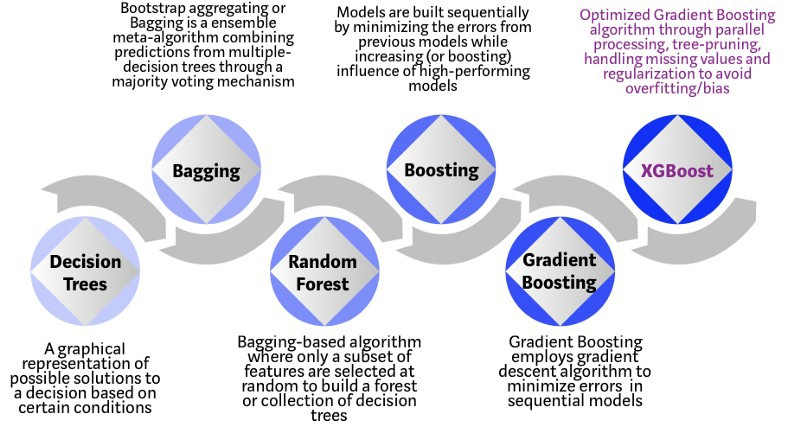

Представьте, что вы специалист по подбору персонала и собеседуете нескольких отличных кандидатов. Каждый шаг эволюции алгоритмов, основанных на деревьях, может быть представлен как версия хода собеседования.

- **Дерево принятия решений**: Каждый специалист по подбору персонала при собеседовании кандидата ориентируется по своему списку критериев: образование, опыт работы, успешность прохождения собеседования.

- **Бэггинг**: Представьте, что вместо одного специалиста по подбору персонала теперь за каждым кандидатом наблюдают несколько, и каждый имеет возможность проголосовать. Этот алгоритм при принятии окончательного решения учитывает все высказанные мнения.

- **Случайный лес**: Этот алгоритм основан на бэггинге. Отличается он тем, что выбирает случайные признаки. То есть, каждый специалист по подбору персонала может проверить знания кандидата лишь в какой-то одной случайно выбранной области.

- **Бустинг**: Это альтернативный подход, в котором каждый специалист по подбору персонала основывается на оценке кандидата предыдущим специалистом. Это ускоряет процесс собеседования, так как не подходящие кандидаты сразу же отсеиваются.

- **Градиентный бустинг**: Частный случай бустинга, в котором ошибка минимизируется алгоритмом градиентного спуска. То есть, наименее квалифицированные кандидаты отсеиваются как можно раньше.

- **XGBoost**: Считайте его градиентным бустингом на стероидах (не зря, ведь он называется экстремальным градиентным бустингом). Это идеальная комбинация оптимизации ПО и железа для получения точных результатов за короткое время с минимальным использованием вычислительных ресурсов.

**Системная оптимизация:**

- **Параллелизация**: В XGBoost построение деревьев основано на параллелизации. Это возможно благодаря взаимозаменяемой природе циклов, используемых для построения базы для обучения: внешний цикл перечисляет листья деревьев, внутренний цикл вычисляет признаки. Нахождение цикла внутри другого мешает параллелизировать алгоритм, так как внешний цикл не может начать своё выполнение, если внутренний ещё не закончил свою работу. Поэтому для улучшения времени работы порядок циклов меняется: инициализация проходит при считывании данных, затем выполняется сортировка, использующая параллельные потоки. Эта замена улучшает производительность алгоритма, распределяя вычисления по потокам.

- **Отсечение ветвей дерева**: В фреймворке GBM критерий остановки для разбиения дерева зависит от критерия отрицательной потери в точке разбиения. XGBoost использует параметр максимальной глубины max_depth вместо этого критерия и начинает обратное отсечение. Этот “глубинный” подход значительно улучшает вычислительную производительность.

- **Аппаратная оптимизация**: Алгоритм был разработан таким образом, чтобы он оптимально использовал аппаратные ресурсы. Это достигается путём создания внутренних буферов в каждом потоке для хранения статистики градиента. Дальнейшие улучшения, как, например, вычисления вне ядра, позволяют работать с большими наборами данных, которые не помещаются в памяти компьютера.

**<center>рис: в нашей задаче случайный лес лучше xgboost</center>**

**<center>Идентификация конкретного пользователя и кривые обучения</center>**

Ошибка на обучающей выборке сама по себе ничего не говорит о качестве модели

- **Кросс-валидационная** ошибка показывает, насколько хорошо модель подстраивается под данные (имеющийся тренд в данных), сохраняя при этом способность обобщения на новые данные
- **Валидационная кривая** представляет собой график, показывающий результат на тренировочной и валидационной выборке в зависимости от сложности модели:
- если две кривые распологаются близко, и обе ошибки велики, — это признак недообучения
- если две кривые далеко друг от друга, — это показатель переобучения
- **Кривая обучения** — это график, показывающий результаты на валидации и тренировочной подвыборке в зависимости от   - количества наблюдений:
- если кривые сошлись друг к другу, добавление новых данных не поможет – надо менять сложность модели
- если кривые еще не сошлись, добавление новых данных может улучшить результат.


*Поскольку может разочаровать, что многоклассовая доля правильных ответов на выборке из 150 пользовалей невелика, порадуемся тому, что конкретного пользователя можно идентифицировать достаточно хорошо. *

**Загрузим сериализованные ранее объекты *X_sparse_150users* и *y_150users*, соответствующие обучающей выборке для 150 пользователей с параметрами (*session_length, window_size*) = (10,10). Так же точно разобьем их на 70% и 30%.**

Обучим LogisticRegressionCV для одного значения параметра C (лучшего на кросс-валидации в 1 части, используйте точное значение, не на глаз). Теперь будем решать 150 задач "Один-против-Всех", поэтому укажем аргумент multi_class='ovr'. Как всегда, где возможно, укажем n_jobs=-1 и random_state=17.

Посмотрим на средние доли правильных ответов на кросс-валидации в задаче идентификации каждого пользователя по отдельности.

Результаты кажутся впечатляющими, но возможно, мы забываем про дисбаланс классов, и высокую долю правильных ответов можно получить константным прогнозом. Посчитаем для каждого пользователя разницу между долей правильных ответов на кросс-валидации (только что посчитанную с помощью LogisticRegressionCV) и долей меток в y_train_150, отличных от ID этого пользователя (именно такую долю правильных ответов можно получить, если классификатор всегда "говорит", что это не пользователь с номером 𝑖 в задаче классификации 𝑖-vs-All).

Дальше будем строить кривые обучения для конкретного пользователя, допустим, для 128-го. Составим новый бинарный вектор на основе y_150users, его значения будут 1 или 0 в зависимости от того, равен ли ID-шник пользователя 128.

**Посчитаем доли правильных ответов на кросс-валидации в задаче классификации "user128-vs-All" в зависимости от размера выборки.**

**<center>кривые обучения еще не сошлись, добавление новых данных может улучшить результат</center>**
**<center>алгоритму помогут новые размеченные данные при той же постановке задачи</center>**

## неделя 5



**<center>необходимо изучить данные тренировочных датасетов, найти отличия в признаках двух классов объектов: сессий рельных пользователей и сессий Алисы</center>**

**<center>Alice's dates of session (train dataset) vs User's dates of session (train dataset)</center>**

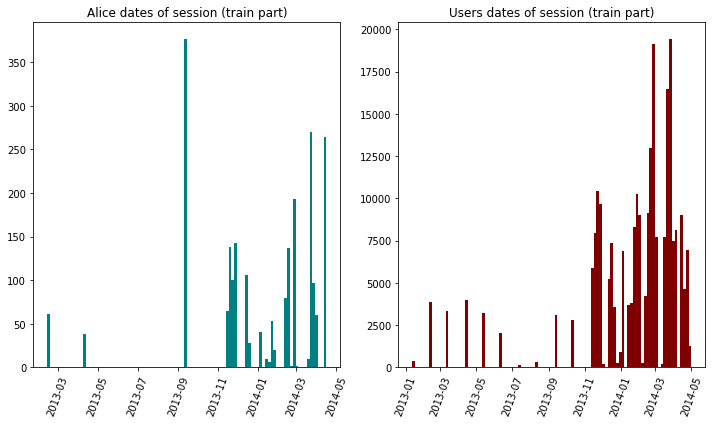

**<center>Alice's len of session (train dataset) vs User's len of session (train dataset), logarithmic transformation</center>**

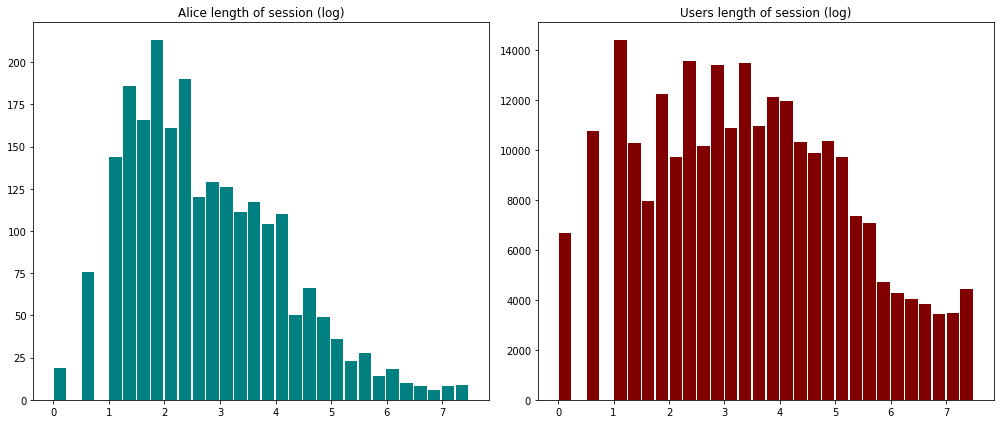

**<center>Alice's weekday schedule (train dataset) vs User's weekday schedule (train dataset)</center>**

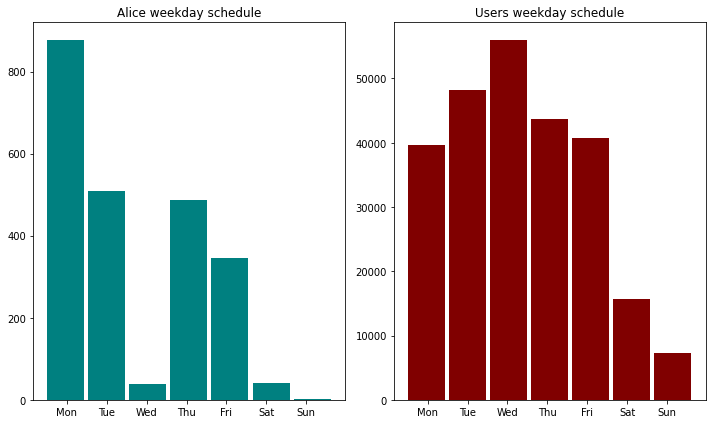

**<center>Alice's start_hour schedule (train dataset) vs User's start_hour schedule (train dataset)</center>**

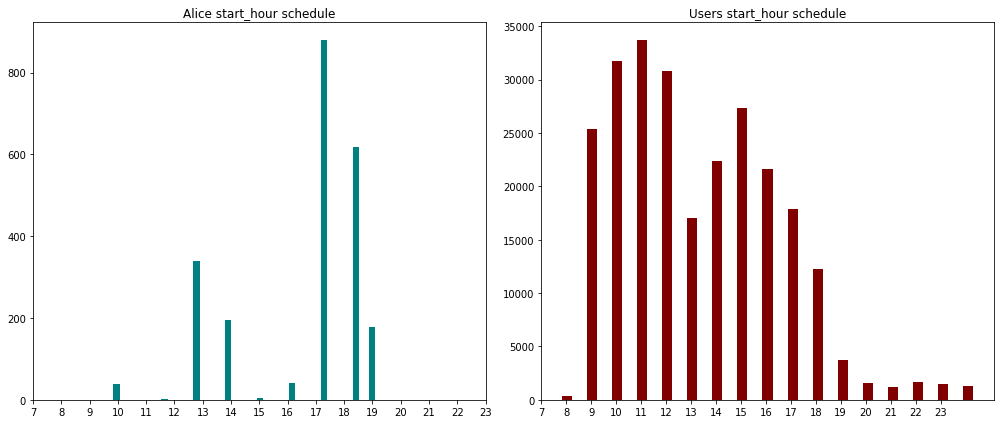

**<center>Alice's day_of_month schedule (train dataset) vs User's day_of_month schedule (train dataset)</center>**

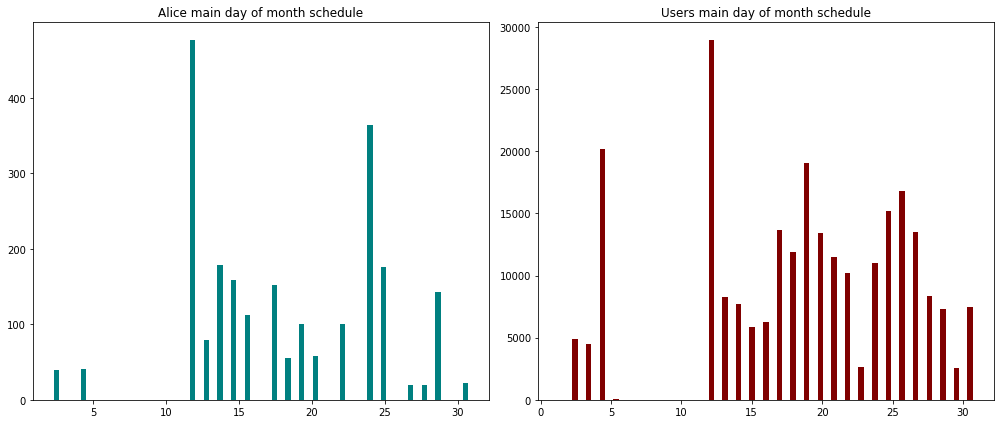

**<center>Alice's minute schedule (train dataset) vs User's minute schedule (train dataset)</center>**

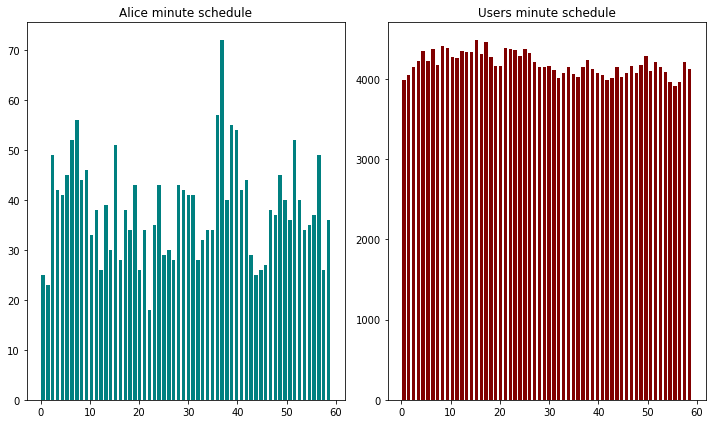

**<center>Alice's month schedule (train dataset) vs User's month schedule (train dataset)</center>**

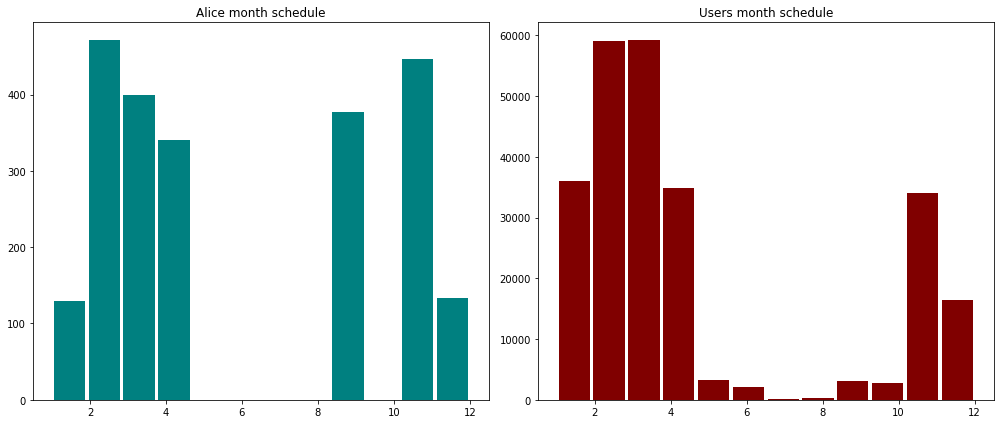

**Now let's compare our train and test sets**

**<center>Date of session train part vs test part</center>**

**<center>Len of session (train dataset) vs len of session (test dataset), logarithmic transformation</center>**

**<center>Weekday schedule (train dataset) vs weekday schedule (test dataset)</center>**

**<center>Start_hour schedule (train dataset) vs start_hour schedule (test dataset)</center>**

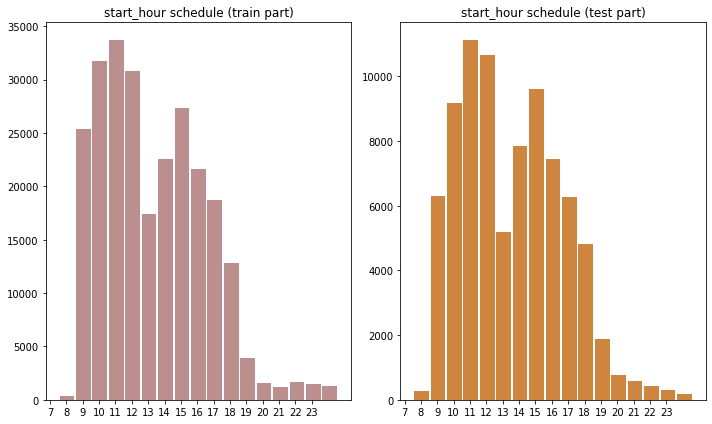

**<center>Day of month (train dataset) vs day of month (test dataset)</center>**

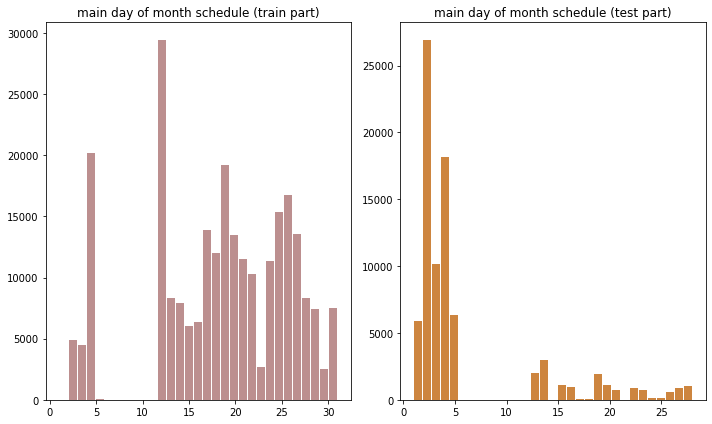

**<center>Minute schedule (train dataset) vs minute schedule (test dataset)</center>**

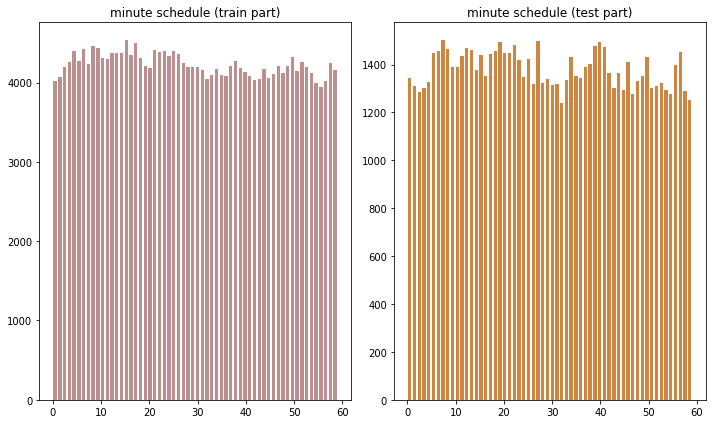

**<center>Month schedule (train dataset) vs month schedule (test dataset)</center>**

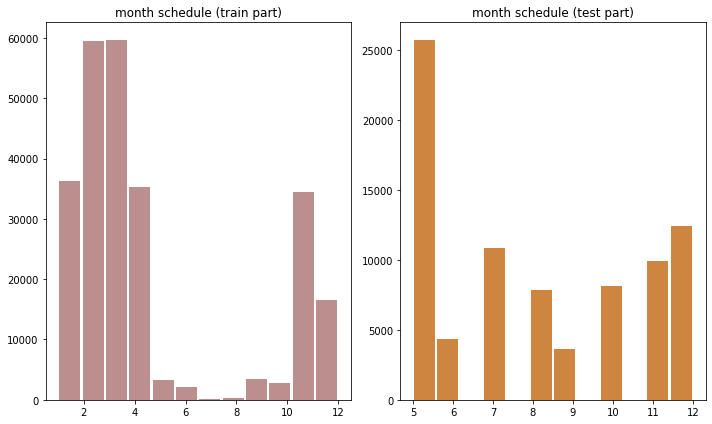

Зная все эти отличия, можно добавлять дополнительные признаки. Ко многим из этих данных применяем OneHotEncoding, так как, например, недельное рассписание, время начала сессии, количество уникальных сайтов в сессии и т.д. - категориальные признаки.

Используем 
- **SGDClassifier**: этот оценщик реализует регуляризованные линейные модели со стохастическим градиентным спуском (SGD)

- популярный метод **GridSearch** для поиска наиболее подходящих гиперпараметров
- метод **predict_proba(X)** для оценки вероятности

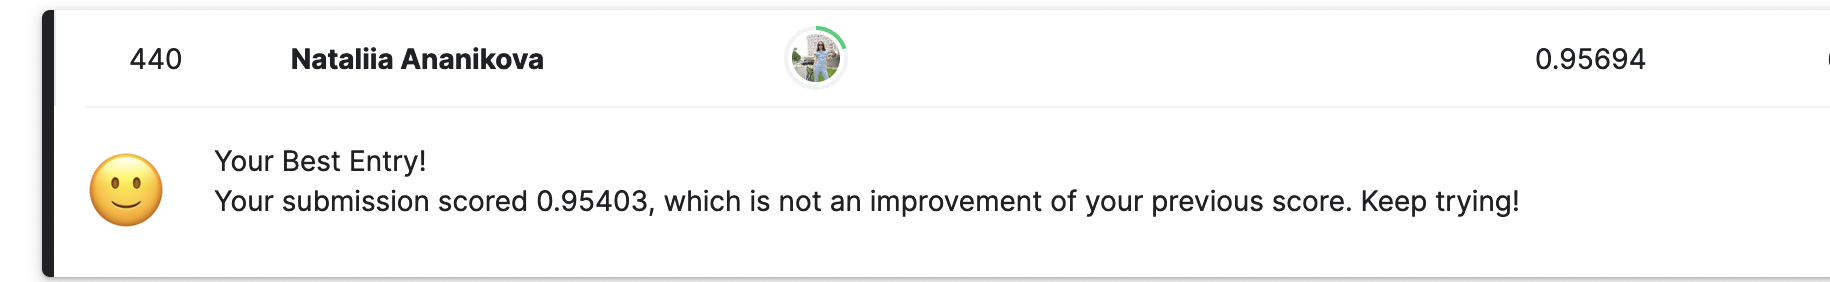

https://gitlab.com/nata.ananikova/internet_user_identification

## неделя 6

Vowpal Wabbit (VW) является одной из наиболее широко используемых библиотек в индустрии. Её отличает высокая скорость работы и поддержка большого количества различных режимов обучения. Особый интерес для больших и высокоразмерных данных представляет онлайн-обучение – самая сильная сторона библиотеки. Также реализовано хэширование признаков, и Vowpal Wabbit отлично подходит для работы с текстовыми данными.

Основным интерфейсом для работы с VW является shell. Vowpal Wabbit считывает данные из файла или стандартного ввода (stdin) в формате, который имеет следующий вид:

[Label] [Importance] [Tag]|Namespace Features |Namespace Features ... |Namespace Features

Namespace=String[:Value]

Features=(String[:Value] )*

где [] обозначает необязательные элементы, а (...)* означает повтор неопределенное число раз.

- **Label** является числом, "правильным" ответом. В случае классификации обычно принимает значение 1/-1, а в случае регрессии некоторое вещественное число
- **Importance** является числом и отвечает за вес примера при обучении. Это позволяет бороться с проблемой несбалансированных данных, изученной нами ранее
- **Tag** является некоторой строкой без пробелов и отвечает за некоторое "название" примера, которое сохраняется при предсказании ответа. Для того, чтобы отделить Tag от Importance лучше начинать Tag с символа '.
- **Namespace** служит для создания отдельных пространств признаков. В аргументах Namespace именуются по первой букве, это нужно учитывать при выборе их названий
- **Features** являются непосредственно признаками объекта внутри Namespace. Признаки по умолчанию имеют вес 1.0, но его можно переопределить, к примеру feature:0.1.


**Обучим модель Vowpal Wabbit на выборке `train_part.vw`. Укажем, что решается задача классификации с 400 классами (`--oaa`), сделаем 3 прохода по выборке (`--passes`). Зададим некоторый кэш-файл (`--cache_file`, можно просто указать флаг `-c`), так VW будет быстрее делать все следующие после первого проходы по выборке (прошлый кэш-файл удаляется с помощью аргумента `-k`). Также укажем значение параметра `b`=26. Это число бит, используемых для хэширования, в данном случае нужно больше, чем 18 по умолчанию. Наконец, укажем `random_seed`=17. Остальные параметры пока не меняем.**

!vw -d train_part.vw --oaa 400 --passes 3 -c -b 26 --random_seed 17 -f train_part_model.vw

**Запишем прогнозы на выборке *valid.vw* в *vw_valid_pred.csv*.**

!vw -d valid.vw -i train_part_model.vw -t -p vw_valid_pred.csv

**Обучим модель VW с теми же параметрами на всей обучающей выборке – *train.vw*.**

!vw -d train.vw --oaa 400 --passes 3 -c -b 26 --random_seed 17 -f train_part_model.vw

**Сделаем прогноз для тестовой выборки.**

!vw -d valid.vw -i train_part_model.vw -t -p vw_valid_pred.csv